# 基于拉普拉斯算子的锐化滤波
## 原理回顾
拉普拉斯算子是一种二阶导数算子，对于离散的数字图像，其一种常见形式为$$\nabla^{2}f(x,y)=f(x + 1,y)+f(x - 1,y)+f(x,y + 1)+f(x,y - 1)-4f(x,y)$$
将该算子应用于图像时，边缘部分的像素灰度值会有较大变化，能提取出图像的轮廓。

通过把原图像与拉普拉斯算子处理后的图像按一定方式相加，可增强轮廓的灰度值，让图像的边缘更加突出，达到锐化的效果。

例如，假设有一张稍微有些模糊的风景照片，照片中远处的山峦轮廓以及近处花草的纹理等细节不是很清晰，使用上述基于拉普拉斯算子的锐化滤波代码进行处理后，山峦的轮廓会变得更加清晰可辨，花草的纹理也会更加明显，整体图像的清晰度得到了提升，不过过度锐化可能也会导致图像看起来有些“生硬”，出现噪声被放大等情况，所以实际应用中可能需要根据图像特点和期望效果适当调整锐化的程度（比如调整与拉普拉斯算子结果相加时的系数等）。

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def laplacian_sharpen(image):
    """
    对输入图像进行基于拉普拉斯算子的锐化滤波
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param k: 拉普拉斯算子的系数，默认为1
    :return: 锐化滤波后的图像（numpy数组表示）
    """
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    t_sharpened_image = [[0 for _ in range(width)] for _ in range(height)]
    # 创建一个与原图像同尺寸的全零数组，用于存储锐化后的图像
    sharpened_image = np.zeros_like(image)
    # 拉普拉斯算子的卷积核（这里采用简单的四邻域形式）
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    # 遍历图像（避开边界像素，因为边界无法完整进行卷积操作）
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            sum_value = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    sum_value += image[y + i][x + j] * kernel[i + 1][j + 1]
            # 将拉普拉斯算子处理后的结果与原图像对应像素相加（这里系数为1，可根据实际调整）
            t_sharpened_image[y][x] = image[y][x] + sum_value
    # 将结果限制在0-255范围内，并转换为整数类型（确保像素值合法）
    t_sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)
    return t_sharpened_image

### 4. 代码解释
- **`laplacian_sharpen`函数**：
    - 该函数接受一个参数`image`，它是输入的灰度图像，以二维的`numpy`数组形式传入（通过`cv2.imread`以灰度图模式读取图像得到的就是这种格式）。
    - 在函数内部，首先通过`image.shape[:2]`获取图像的高度和宽度，然后创建一个与原图像同尺寸的全零数组`sharpened_image`，用于存储锐化后的图像数据。
    - 接着定义了拉普拉斯算子对应的卷积核`kernel`，这里采用的是简单的四邻域形式（中心像素周围上下左右四个像素参与运算），其形式与拉普拉斯算子公式\(\nabla^{2}f(x,y)=f(x + 1,y)+f(x - 1,y)+f(x,y + 1)+f(x,y - 1)-4f(x,y)\)相对应，在代码中以二维数组表示。
    - 之后使用嵌套的`for`循环遍历图像中除边界像素外的像素点（因为边界像素无法完整地按照卷积核大小进行卷积操作），对于每个像素点，再通过两层嵌套的`for`循环遍历卷积核对应的邻域像素，将邻域内像素灰度值与卷积核对应元素相乘后相加，得到`sum_value`，这一步相当于用拉普拉斯算子对该像素进行了处理。
    - 然后将拉普拉斯算子处理后的结果`sum_value`与原图像对应像素`image[y, x]`相加（这里相加的系数为1，实际应用中可以根据需要调整这个系数来控制锐化程度），并将结果赋值给`sharpened_image`对应位置的像素，完成对该像素的锐化操作。
    - 最后，由于相加后的像素值可能超出图像像素值的有效范围（0 - 255），所以使用`np.clip`函数将其限制在这个范围内，并通过`astype(np.uint8)`将其转换为8位无符号整数类型（符合图像像素值的常见数据类型要求），返回锐化后的图像`sharpened_image`。

## 示例用法

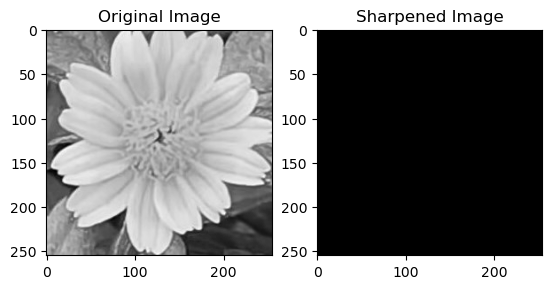

In [6]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 进行基于拉普拉斯算子的锐化滤波
sharpened_image = laplacian_sharpen(image)

# 使用matplotlib在Jupyter Notebook中显示原始图像和锐化后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()

## 使用opencv库实现锐化滤波

`opencv-python`库本身也提供了现成的基于拉普拉斯算子的锐化滤波相关函数（如`cv2.Laplacian`等），使用起来更加高效简洁，使用示例如下：

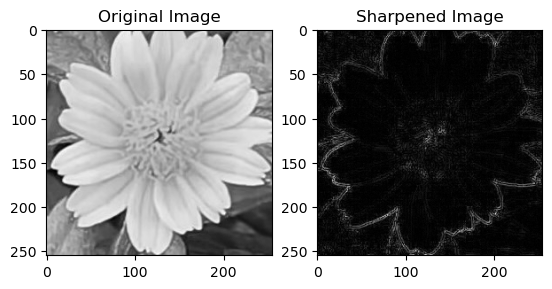

In [8]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 使用cv2.Laplacian进行基于拉普拉斯算子的锐化滤波，需指定数据类型为cv2.CV_64F（用于中间计算），然后再转换为合适的类型显示
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
sharpened_image = cv2.convertScaleAbs(laplacian_image)

# 使用matplotlib在Jupyter Notebook中显示原始图像和锐化后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()

可以看到，锐化滤波之后，可以提取出图像的边缘轮廓，并且opencv库提供的函数处理效果更好。